In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

<pre>
csv 파일 불러올 때 thousand = ',' 추가하면 int로 불러들임
단순히 불러왔을 때는 천단위 , 때문에 object형
</pre>

In [27]:
df = pd.read_csv('ECOS_월별_201501_202103_주택담보대출_일반신용대출.csv')
df = df.T
df.rename(columns=df.iloc[0],inplace=True)
df.drop(df.index[0],inplace=True)
loan_rate = df.reset_index(drop=False)
loan_rate.columns = ['날짜','주택담보대출','일반신용대출']
loan_rate.info()
loan_rate.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      75 non-null     object
 1   주택담보대출  75 non-null     object
 2   일반신용대출  75 non-null     object
dtypes: object(3)
memory usage: 1.9+ KB


,날짜,주택담보대출,일반신용대출
0,2015-01,3.34,4.99
1,2015-02,3.24,4.88
2,2015-03,2.97,4.75
3,2015-04,2.81,4.46
4,2015-05,3.06,4.53


In [3]:
df = pd.read_csv('ECOS_월별_201501_202104_시장금리_국고채.csv')
df = df.T
df.rename(columns=df.iloc[0],inplace=True)
df.drop(df.index[0],inplace=True)
govern_bond = df.reset_index(drop=False)
govern_bond.columns = ['날짜','국고채_3년','국고채_5년']
govern_bond.info()
govern_bond.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      76 non-null     object
 1   국고채_3년  76 non-null     object
 2   국고채_5년  76 non-null     object
dtypes: object(3)
memory usage: 1.9+ KB


,날짜,국고채_3년,국고채_5년
0,2015-01,2.039,2.158
1,2015-02,2.024,2.116
2,2015-03,1.865,1.969
3,2015-04,1.739,1.857
4,2015-05,1.875,2.11


In [4]:
df = pd.read_csv('ECOS_월별_201501_202103_한국은행_기준금리.csv')
df = df.T
df.rename(columns=df.iloc[0],inplace=True)
df.drop(df.index[0],inplace=True)
KBank_rate = df.reset_index(drop=False)
KBank_rate.columns = ['날짜','한국은행_기준금리']
KBank_rate.info()
KBank_rate.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   날짜         75 non-null     object
 1   한국은행_기준금리  75 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


,날짜,한국은행_기준금리
0,2015-01,2
1,2015-02,2
2,2015-03,1.75
3,2015-04,1.75
4,2015-05,1.75


In [28]:
bond_foreg_volume = pd.read_csv('월별_외국인_선물국채_거래량.csv',thousands=',')
bond_foreg_volume.head()

,날짜,선물국채_3년매도,선물국채_3년매수,선물국채_10년매도,선물국채_10년매수
0,2015-01,628712,666669,257845,262540
1,2015-02,534523,504282,194405,190053
2,2015-03,911532,970220,276769,282914
3,2015-04,747000,722346,239766,240792
4,2015-05,889646,881473,298456,299327


In [6]:
data = pd.merge(KBank_rate,govern_bond,on='날짜',how='outer')
data.head()

,날짜,한국은행_기준금리,국고채_3년,국고채_5년
0,2015-01,2,2.039,2.158
1,2015-02,2,2.024,2.116
2,2015-03,1.75,1.865,1.969
3,2015-04,1.75,1.739,1.857
4,2015-05,1.75,1.875,2.11


In [7]:
data = pd.merge(data,loan_rate,on='날짜',how='outer')
# data['주택담보대출(연%)'].fillna(method='ffill',inplace=True)
# data['일반신용대출(연%)'].fillna(method='ffill',inplace=True)
data.head(10)

,날짜,한국은행_기준금리,국고채_3년,국고채_5년,주택담보대출,일반신용대출
0,2015-01,2,2.039,2.158,3.34,4.99
1,2015-02,2,2.024,2.116,3.24,4.88
2,2015-03,1.75,1.865,1.969,2.97,4.75
3,2015-04,1.75,1.739,1.857,2.81,4.46
4,2015-05,1.75,1.875,2.11,3.06,4.53
5,2015-06,1.5,1.773,2.04,3.01,4.46
6,2015-07,1.5,1.777,2.048,2.96,4.41
7,2015-08,1.5,1.735,1.946,2.94,4.34
8,2015-09,1.5,1.651,1.846,2.92,4.4
9,2015-10,1.5,1.627,1.784,2.9,4.41


In [8]:
data = pd.merge(data,bond_foreg_volume,on='날짜',how='outer')
data.head(10)

,날짜,한국은행_기준금리,국고채_3년,국고채_5년,주택담보대출,일반신용대출,선물국채_3년매도,선물국채_3년매수,선물국채_10년매도,선물국채_10년매수
0,2015-01,2,2.039,2.158,3.34,4.99,"628,712","666,669","257,845","262,540"
1,2015-02,2,2.024,2.116,3.24,4.88,"534,523","504,282","194,405","190,053"
2,2015-03,1.75,1.865,1.969,2.97,4.75,"911,532","970,220","276,769","282,914"
3,2015-04,1.75,1.739,1.857,2.81,4.46,"747,000","722,346","239,766","240,792"
4,2015-05,1.75,1.875,2.11,3.06,4.53,"889,646","881,473","298,456","299,327"
5,2015-06,1.5,1.773,2.04,3.01,4.46,"903,126","902,183","340,607","342,359"
6,2015-07,1.5,1.777,2.048,2.96,4.41,"384,450","453,969","216,664","231,528"
7,2015-08,1.5,1.735,1.946,2.94,4.34,"442,844","436,073","291,574","291,956"
8,2015-09,1.5,1.651,1.846,2.92,4.4,"732,504","739,938","328,222","329,732"
9,2015-10,1.5,1.627,1.784,2.9,4.41,"574,373","546,815","226,849","219,309"


# 데이터 전처리

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 75
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   날짜          76 non-null     object
 1   한국은행_기준금리   75 non-null     object
 2   국고채_3년      76 non-null     object
 3   국고채_5년      76 non-null     object
 4   주택담보대출      75 non-null     object
 5   일반신용대출      75 non-null     object
 6   선물국채_3년매도   76 non-null     object
 7   선물국채_3년매수   76 non-null     object
 8   선물국채_10년매도  76 non-null     object
 9   선물국채_10년매수  76 non-null     object
dtypes: object(10)
memory usage: 6.5+ KB


In [10]:
data[data['날짜']>='2019']

,날짜,한국은행_기준금리,국고채_3년,국고채_5년,주택담보대출,일반신용대출,선물국채_3년매도,선물국채_3년매수,선물국채_10년매도,선물국채_10년매수
48,2019-01,1.75,1.807,1.879,3.12,4.57,"551,716","558,013","491,737","511,145"
49,2019-02,1.75,1.802,1.869,3.08,4.49,"432,824","413,668","369,805","373,308"
50,2019-03,1.75,1.789,1.838,3.04,4.63,"1,105,988","1,130,385","593,032","605,069"
51,2019-04,1.75,1.736,1.771,2.98,4.54,"729,783","724,334","629,081","612,245"
52,2019-05,1.75,1.679,1.716,2.93,4.4,"636,583","683,794","594,837","623,113"
53,2019-06,1.75,1.496,1.53,2.74,4.23,"1,353,454","1,334,453","628,288","624,564"
54,2019-07,1.5,1.382,1.421,2.64,3.96,"757,516","760,194","570,824","558,414"
55,2019-08,1.5,1.164,1.201,2.47,3.63,"916,471","892,088","770,598","772,403"
56,2019-09,1.5,1.287,1.353,2.51,3.86,"1,362,866","1,330,320","746,784","727,502"
57,2019-10,1.25,1.357,1.442,2.5,3.9,"1,325,442","1,291,403","773,387","743,458"


## 결측치 확인

In [11]:
data.isnull().sum()

날짜            0
한국은행_기준금리     1
국고채_3년        0
국고채_5년        0
주택담보대출        1
일반신용대출        1
선물국채_3년매도     0
선물국채_3년매수     0
선물국채_10년매도    0
선물국채_10년매수    0
dtype: int64

In [12]:
# 결측치 제거 - null값 : 휴일
data.dropna(axis=0,inplace=True)

In [13]:
data.info() # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   날짜          75 non-null     object
 1   한국은행_기준금리   75 non-null     object
 2   국고채_3년      75 non-null     object
 3   국고채_5년      75 non-null     object
 4   주택담보대출      75 non-null     object
 5   일반신용대출      75 non-null     object
 6   선물국채_3년매도   75 non-null     object
 7   선물국채_3년매수   75 non-null     object
 8   선물국채_10년매도  75 non-null     object
 9   선물국채_10년매수  75 non-null     object
dtypes: object(10)
memory usage: 6.4+ KB


<AxesSubplot:>

<Figure size 864x576 with 0 Axes>

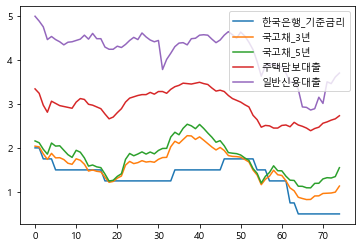

In [14]:
plt.figure(figsize=(12,8))
data.plot()

In [15]:
data.head()

,날짜,한국은행_기준금리,국고채_3년,국고채_5년,주택담보대출,일반신용대출,선물국채_3년매도,선물국채_3년매수,선물국채_10년매도,선물국채_10년매수
0,2015-01,2,2.039,2.158,3.34,4.99,"628,712","666,669","257,845","262,540"
1,2015-02,2,2.024,2.116,3.24,4.88,"534,523","504,282","194,405","190,053"
2,2015-03,1.75,1.865,1.969,2.97,4.75,"911,532","970,220","276,769","282,914"
3,2015-04,1.75,1.739,1.857,2.81,4.46,"747,000","722,346","239,766","240,792"
4,2015-05,1.75,1.875,2.11,3.06,4.53,"889,646","881,473","298,456","299,327"


## 차트

In [16]:
data.columns

Index(['날짜', '한국은행_기준금리', '국고채_3년', '국고채_5년', '주택담보대출', '일반신용대출', '선물국채_3년매도',
       '선물국채_3년매수', '선물국채_10년매도', '선물국채_10년매수'],
      dtype='object')

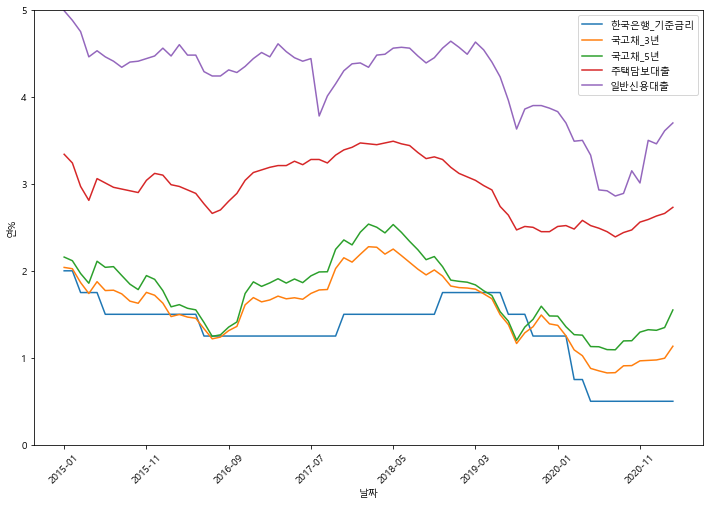

In [18]:
# 전체데이터
data.plot(kind='line',y=['한국은행_기준금리', '국고채_3년', '국고채_5년',
                         '주택담보대출', '일반신용대출'],
          figsize=(12,8),ylabel='연%',xlabel='날짜',x='날짜')
plt.ylim(0,5)
plt.xticks(rotation=45)
plt.show()
# x축 표시가 랜덤 -- 나눠 봐야할 듯

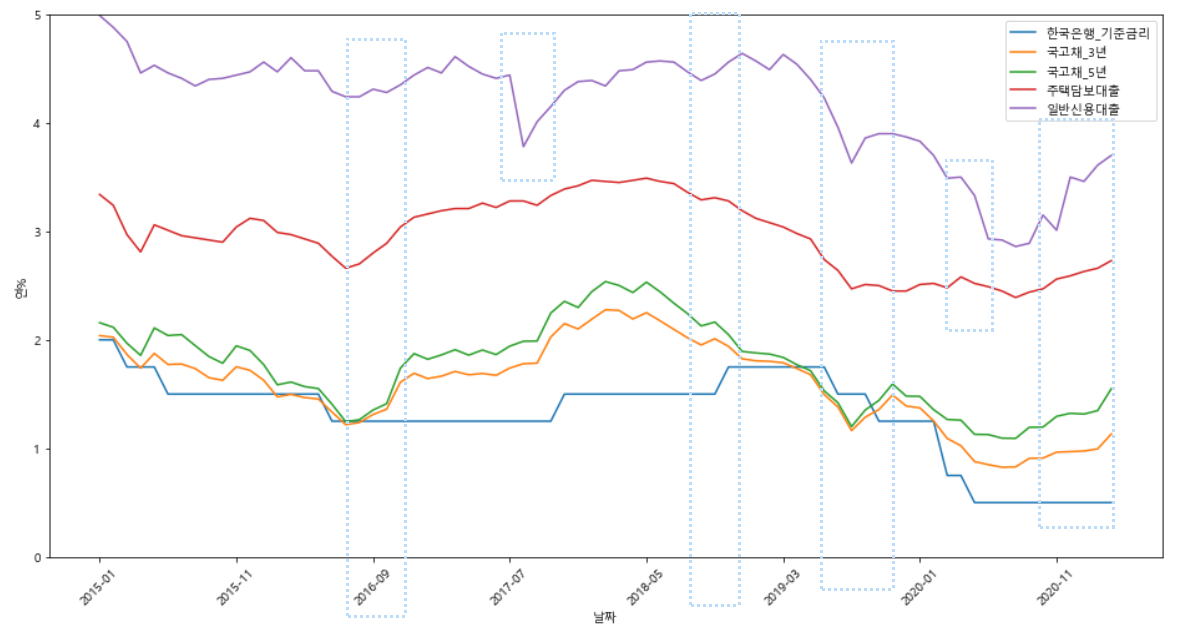

In [22]:
# 확인 필요한 부분 체크
Image('checklist.png')

In [ ]:
# 연별로 
feature = ['한국은행_기준금리', '국고채_3년', '국고채_5년', '주택담보대출', '일반신용대출']
date_2018 = data[(data['날짜']>='2018')&(data['날짜']<'2019')]
date_2019 = data[(data['날짜']>='2019')&(data['날짜']<'2020')]
date_2020 = data[(data['날짜']>='2020')&(data['날짜']<='2020-08')]
date_select = [date_2018,date_2019,date_2020]
ncols=3
plt.figure(figsize=(24,24))
fig, ax = plt.subplots(ncols=ncols)
for n in range(ncols):
    plt.ylim(0,5)
    plt.xticks(rotation=45)
    plt.locator_params(axis='x', nbins=(date_select[n].shape[0]))
    date_select[n].plot(kind='line',y=feature,figsize=(16,6),ylabel='연%',xlabel='날짜',x='날짜',ax=ax[n])
